<a href="https://colab.research.google.com/github/eduardomatoss/fiap-cybersecurity/blob/main/global-solution/gs_cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd


In [30]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [31]:
df

# Dummies com Type
# Drop Na
# Transform type nameOrig e nameDest / Ou Drop

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
260504,14,CASH_OUT,178684.97,C8826189,21907.00,0.00,C1656139345,2842641.84,3116495.42,0.0,0.0
260505,14,CASH_OUT,118586.47,C185704945,35509.00,0.00,C726864847,39.00,0.00,0.0,0.0
260506,14,CASH_OUT,308503.35,C1324237571,123433.72,0.00,C500437472,97892.36,458476.08,0.0,0.0
260507,14,CASH_OUT,310920.52,C1355560664,0.00,0.00,C625901069,1499435.86,1876515.71,0.0,0.0


In [32]:
df.shape

(260509, 11)

In [33]:
df[df.isna().any(axis=1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
260508,14,CASH_OUT,56206.95,C1695876425,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260509 entries, 0 to 260508
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260509 non-null  int64  
 1   type            260509 non-null  object 
 2   amount          260509 non-null  float64
 3   nameOrig        260509 non-null  object 
 4   oldbalanceOrg   260509 non-null  float64
 5   newbalanceOrig  260509 non-null  float64
 6   nameDest        260508 non-null  object 
 7   oldbalanceDest  260508 non-null  float64
 8   newbalanceDest  260508 non-null  float64
 9   isFraud         260508 non-null  float64
 10  isFlaggedFraud  260508 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 21.9+ MB


In [35]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,260509.000000,2.605090e+05,2.605090e+05,2.605090e+05,2.605080e+05,2.605080e+05,260508.000000,260508.0
mean,10.904337,1.784775e+05,8.841306e+05,9.027391e+05,9.611855e+05,1.194126e+06,0.000641,0.0
std,2.414674,3.123849e+05,2.820156e+06,2.857684e+06,2.366205e+06,2.612450e+06,0.025311,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.246374e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.483560e+04,1.878000e+04,0.000000e+00,6.998200e+04,1.682056e+05,0.000000,0.0
75%,13.000000,2.316096e+05,1.846340e+05,2.230885e+05,8.215832e+05,1.225196e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


In [36]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.dropna(inplace=True)

In [39]:
df.drop(columns=["nameOrig", "nameDest"], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260508 entries, 0 to 260507
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260508 non-null  int64  
 1   type            260508 non-null  object 
 2   amount          260508 non-null  float64
 3   oldbalanceOrg   260508 non-null  float64
 4   newbalanceOrig  260508 non-null  float64
 5   oldbalanceDest  260508 non-null  float64
 6   newbalanceDest  260508 non-null  float64
 7   isFraud         260508 non-null  float64
 8   isFlaggedFraud  260508 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 19.9+ MB


In [41]:
df.shape

(260508, 9)

In [42]:
df_set_dummies = pd.get_dummies(df["type"])
df_set_dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [43]:
df_without_type = df.drop(columns=["type"])
df_without_type.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [44]:
df_final = pd.concat([df_without_type, df_set_dummies], axis=1)
df_final.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,0,0,1,0


In [45]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260508 entries, 0 to 260507
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            260508 non-null  int64  
 1   amount          260508 non-null  float64
 2   oldbalanceOrg   260508 non-null  float64
 3   newbalanceOrig  260508 non-null  float64
 4   oldbalanceDest  260508 non-null  float64
 5   newbalanceDest  260508 non-null  float64
 6   isFraud         260508 non-null  float64
 7   isFlaggedFraud  260508 non-null  float64
 8   CASH_IN         260508 non-null  uint8  
 9   CASH_OUT        260508 non-null  uint8  
 10  DEBIT           260508 non-null  uint8  
 11  PAYMENT         260508 non-null  uint8  
 12  TRANSFER        260508 non-null  uint8  
dtypes: float64(7), int64(1), uint8(5)
memory usage: 19.1 MB


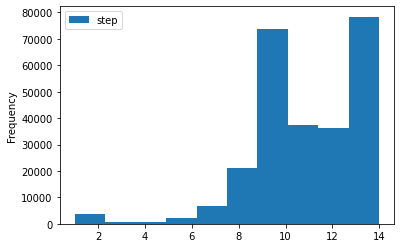

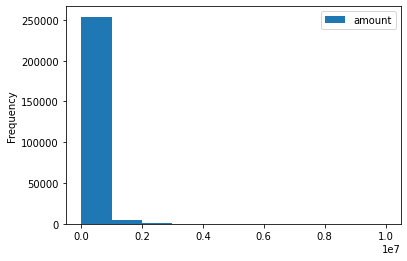

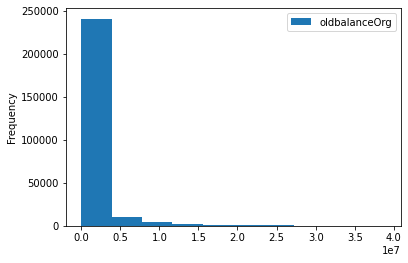

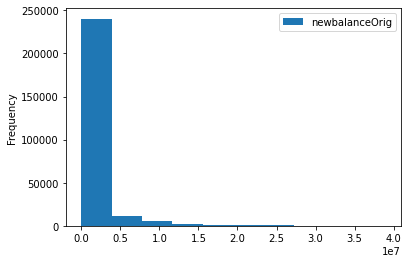

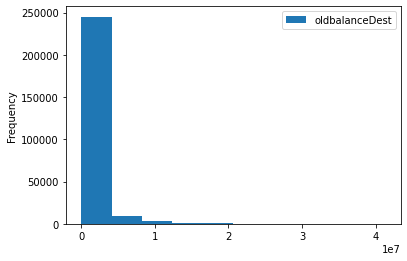

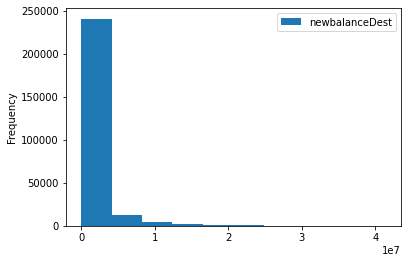

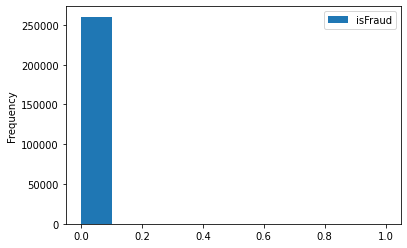

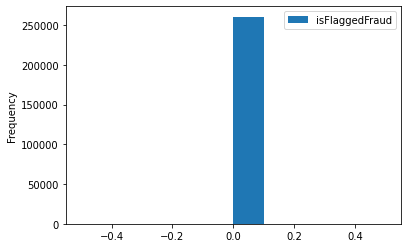

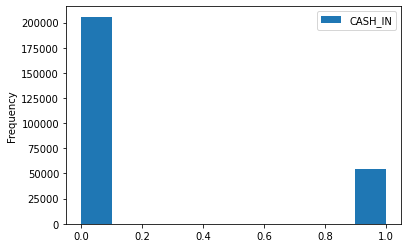

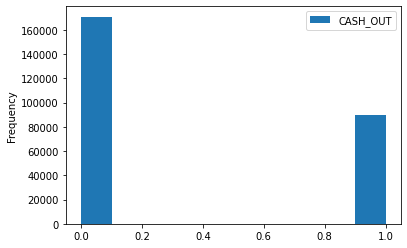

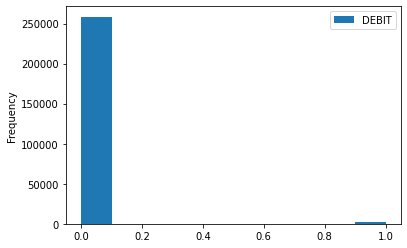

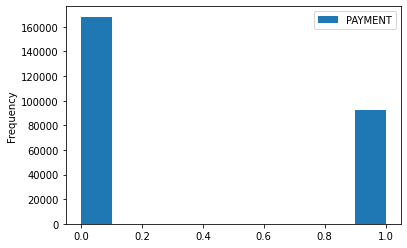

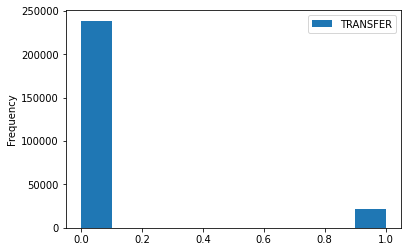

In [46]:
import matplotlib.pyplot as plt

for i in df_final.columns:
  df_final[i].plot.hist(legend=True)
  plt.show()

In [47]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=["isFlaggedFraud"])
y = df_final["isFlaggedFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [48]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax = minmax.transform(X_test)

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

def mlp_classifier(X_train, y_train, X_test, y_test):

  mlp = MLPClassifier(hidden_layer_sizes=(5,),
                    random_state=1,                    
                    activation="logistic",
                    solver="lbfgs")

  mlp.fit(X_train, y_train)

  y_pred = mlp.predict(X_test)

  return print(classification_report(y_test, y_pred))


In [50]:
mlp_classifier(X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52102

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102



In [51]:
mlp_classifier(X_train_minmax, y_train, X_test_minmax, y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52102

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102



In [52]:
from xgboost import XGBClassifier

def xgb_classifier(X_train, y_train, X_test, y_test):

  xgb = XGBClassifier(n_estimators=10,
                        max_depth=50,
                        booster='gbtree',
                        learning_rate=0.01,
                        verbosity=0,
                        silent=True)
  xgb.fit(X_train, y_train, eval_set=[(X_train, y_train)])

  y_pred = xgb.predict(X_test)

  return print(classification_report(y_test, y_pred))

In [53]:
xgb_classifier(X_train, y_train, X_test, y_test)

[0]	validation_0-error:0
[1]	validation_0-error:0
[2]	validation_0-error:0
[3]	validation_0-error:0
[4]	validation_0-error:0
[5]	validation_0-error:0
[6]	validation_0-error:0
[7]	validation_0-error:0
[8]	validation_0-error:0
[9]	validation_0-error:0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52102

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102



In [54]:
xgb_classifier(X_train_minmax, y_train, X_test_minmax, y_test)

[0]	validation_0-error:0
[1]	validation_0-error:0
[2]	validation_0-error:0
[3]	validation_0-error:0
[4]	validation_0-error:0
[5]	validation_0-error:0
[6]	validation_0-error:0
[7]	validation_0-error:0
[8]	validation_0-error:0
[9]	validation_0-error:0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52102

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102

